In [76]:
import numpy as np
import os
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import ensemble
from sklearn import cross_validation
import tensorflow as tf
import pandas as pd
import skimage
import seaborn as sns
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
K.set_image_data_format('channels_last')

In [77]:
img_list = os.listdir(path="train-jpg")
len(img_list)

40479

In [78]:
img_list[:10]

['train_0.jpg',
 'train_1.jpg',
 'train_10.jpg',
 'train_100.jpg',
 'train_1000.jpg',
 'train_10000.jpg',
 'train_10001.jpg',
 'train_10002.jpg',
 'train_10003.jpg',
 'train_10004.jpg']

In [79]:
img = [mpimg.imread("train-jpg" +  "/"+ img_name) for img_name in img_list]

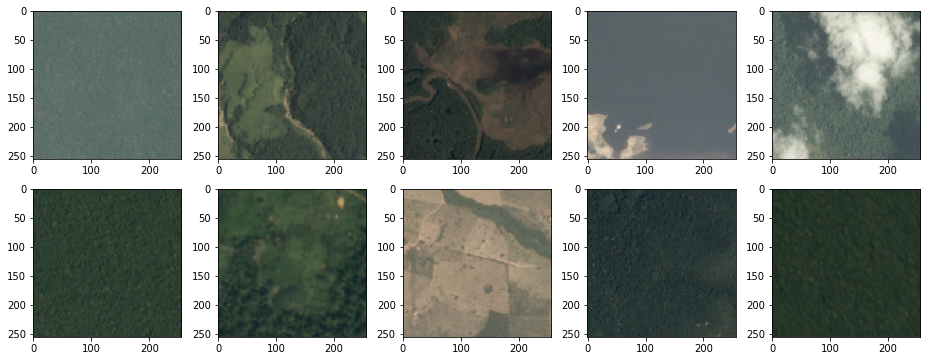

In [80]:
plt.figure(figsize=(16,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(img[i])
plt.show()

In [ ]:
labels_df = pd.read_csv('train_v2.csv')
labels_df.head()

In [82]:
labels_list = []
for tag_str in labels_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in labels_list:
            labels_list.append(label)

In [83]:
print(len(labels_list))
labels_list

17


['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

In [84]:
common_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation', 'road', 'bare_ground']
cloud_labels = ['clear', 'partly_cloudy', 'cloudy', 'haze']
lescom_labels = {'slash_burn', 'selective_logging', 'blooming', 'conventional_mine', 'artisinal_mine', 'blow_down'}
print(len(common_labels)+len(cloud_labels)+len(lescom_labels))

17


In [85]:
def vectorbuilder(rowoftags, tlist):
    vector=np.zeros(len(tlist))
    i = 0
    for t in tlist:
        if t in rowoftags:
            vector[i]=1
        i+=1
    return vector
           
labels_df['common'] =labels_df['tags'].apply(lambda t: vectorbuilder(t,common_labels))
labels_df['cloud'] =labels_df['tags'].apply(lambda t: vectorbuilder(t,cloud_labels))
labels_df['lescom'] =labels_df['tags'].apply(lambda t: vectorbuilder(t,lescom_labels))
labels_df.head()

,image_name,tags,common,cloud,lescom
0,train_0,haze primary,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,train_1,agriculture clear primary water,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,train_2,clear primary,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,train_3,clear primary,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,train_4,agriculture clear habitation primary road,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [86]:
for l in labels_list:
    labels_df[l]=1 if l in labels_df['tags'] else 0
labels_df.head()

,image_name,tags,common,cloud,lescom,haze,primary,agriculture,clear,water,...,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model for common labels: modelC

In [87]:
IMG_SIZE = 256
NUML=7
modelc = Sequential()
modelc.add(Conv2D(32, (20, 20), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,4)))
modelc.add(Conv2D(64, (20, 20), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,4)))
modelc.add(MaxPooling2D(pool_size=(2,2)))
modelc.add(Dropout(0.25))
modelc.add(Flatten())
modelc.add(Dense(128, activation='sigmoid'))
modelc.add(Dropout(0.5))
modelc.add(Dense(NUML, activation='softmax'))

In [88]:
from keras.optimizers import SGD

lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
modelc.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [89]:
def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))


In [90]:
type(labels_df['common'])

pandas.core.series.Series

In [ ]:
len(labels_df['common'])

40479

In [ ]:
X = np.array(img, dtype='float32')
Y1 = labels_df[['primary', 'agriculture', 'water', 'cultivation', 'habitation', 'road', 'bare_ground']]
modelc.fit(X, Y1,
          batch_size=32,
          epochs=30,
          validation_split=0.2
          )